# __Supervised Learning: Basic Steps in Model creation__

__Linear Regression Dataset__ - simple dataset for beginners to learn Linear Regression. Includes 2 columns x and y in which x is the independent feature whereas y is the dependant feature or we can say the target feature. ( `Source`: https://www.kaggle.com/datasets/devbatrax/linear-regression-dataset )

__Basic Steps:__

1. Import the relevant packages.
2. Import the dataset.
3. Check the head and tail portion of the dataset and also the dataset info, also work on NAN values like removing them or imputing them with appropriate values.
4. Separate the feature and target variables (`X` and `y`) by performing a vertical split on the dataset.
5. Split the data into training and testing data (`X_train`, `y_train`, `X_test`, `y_test`) by performing a horizontal split on the dataset.
  

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import train_test_split function from sklearn's model_selection module
from sklearn.model_selection import train_test_split

# Import the LinearRegression class from scikit-learn's linear_model module
from sklearn.linear_model import LinearRegression

# Import necessary libraries for performance metrics
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
linear_reg_data = pd.read_csv("linear_regression_dataset.csv")
linear_reg_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [10]:
linear_reg_data.tail()

,x,y
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685
699,97.0,94.975266


In [14]:
linear_reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


##### __Observations:__

- Here `y` has a null value which we have to remove.

In [148]:
linear_reg_data = linear_reg_data.dropna()

In [150]:
linear_reg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


In [152]:
linear_reg_data.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


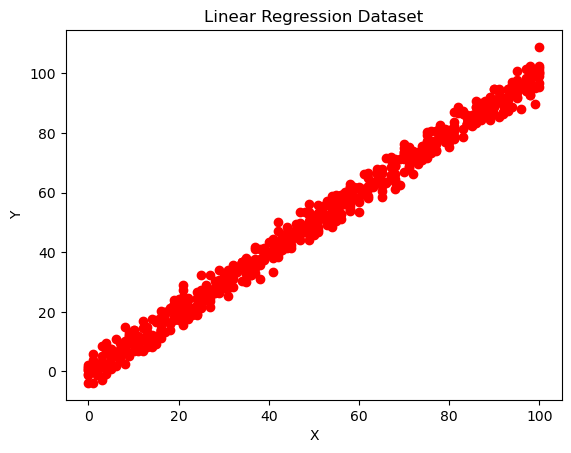

In [154]:
plt.scatter(x = "x", y = "y", data = linear_reg_data, color = "red", marker = "o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Dataset")
plt.show()

In [156]:
X = linear_reg_data[["x"]]
X.head()

,x
0,24.0
1,50.0
2,15.0
3,38.0
4,87.0


In [158]:
y = linear_reg_data[["y"]]
y.head()

,y
0,21.549452
1,47.464463
2,17.218656
3,36.586398
4,87.288984


In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [162]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

489
210
489
210


### __Perform Linear Regression on the dataset to create the model__

__Next Steps:__

1. Create an instance/object of the LinearRegression class.
2. Fit the model on the training data `X_train` and `y_train`.
3. Visualize the fitted data using a scatter plot (using test set data).
4. Find the model output parameters - intercept and the slope of the line.

In [165]:
linear_reg_obj = LinearRegression()

linear_reg_obj.fit(X_train, y_train)

LinearRegression()

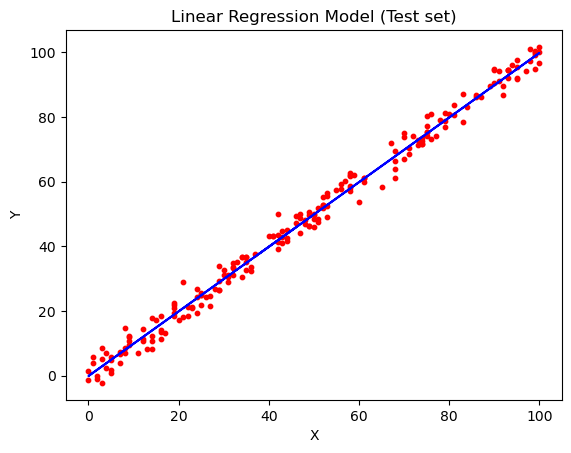

In [167]:
plt.scatter(X_test, y_test, s=10, color = "red", marker = "o")
plt.plot(X_train, linear_reg_obj.predict(X_train), color = "blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression Model (Test set)")
plt.show()

In [169]:
# Intercept
linear_reg_obj.intercept_

array([-0.09794232])

In [171]:
# Slope
linear_reg_obj.coef_

array([[0.999368]])

#### __Need to find the training and testing accuracy of the model__

__Next Steps:__

1. Get the predicted values (`y_train_pred`) of training data `y_train` based on `X_train` values for the __Training Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
4. Get the predicted values (`y_test_pred`) of test data `y_test` based on `X_test` values for the __Testing/Inferencing Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.

In [295]:
y_train_pred = linear_reg_obj.predict(X_train)
y_test_pred = linear_reg_obj.predict(X_test)

In [297]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

7.897876424239772

In [299]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.9905347383228336

In [301]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

7.812343859278598

In [303]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.9910007028176463

In [305]:
linear_reg_model_params_df = pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]], columns = ["MSE", "R2_Score"], index = ["Train", "Test"])
linear_reg_model_params_df

,MSE,R2_Score
Train,7.897876,0.990535
Test,7.812344,0.991001


### __Perform Non-Linear(Polynomial) Regression on the dataset to create the model__

__Next Steps:__

1. Create PolynomialFeatures features transformer object with degree 4.
2. Create new feature set using `fit_transform` on `X_train` which is `X_train_poly`.
3. Apply the same transformation (feature set) on `X_test` which is `X_test_poly`.
4. Create an instance/object of the LinearRegression class.
5. Fit the model on the transformed training data `X_train_poly` and `y_train`.ar
6. Create a variable `X_range` to create a continuous range of values for the independent variable (X) that spans from the minimum to the maximum values found in both the training and test datasets.
7. Visualize the fitted data using a scatter plot (using test set data).
8. Find the model output parameters - intercept and the slope of the line.

In [222]:
# Import the PolynomialFeatures class from scikit-learn's preprocessing module
from sklearn.preprocessing import PolynomialFeatures

In [231]:
poly_features = PolynomialFeatures(degree = 4)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit(X_test)

In [237]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [264]:
X_range = np.arange(min(np.min(X_train), np.min(X_test)), max(np.max(X_train), np.max(X_test)), 0.1)
X_range = X_range.reshape((len(X_range), 1))
X_range[:5]

array([[0. ],
       [0.1],
       [0.2],
       [0.3],
       [0.4]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


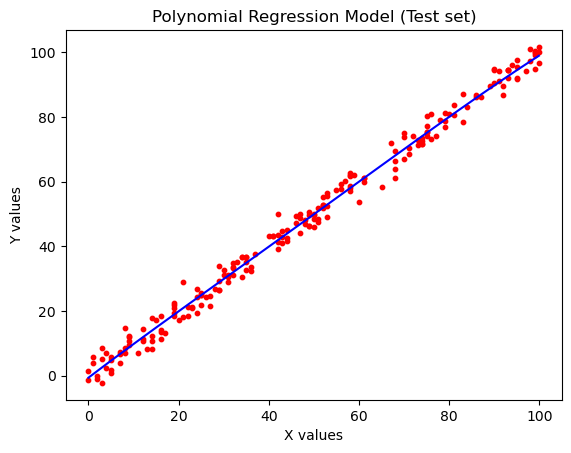

In [278]:
plt.scatter(X_test, y_test, s=10, color = "red", marker = "o")
plt.plot(X_range, poly_model.predict(poly_features.transform(X_range)), color='blue')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Polynomial Regression Model (Test set)")
plt.show()

In [281]:
# Slope of the curved line (4 degrees)
poly_model.coef_

array([[ 0.00000000e+00,  1.06275407e+00, -2.51207089e-03,
         4.05652922e-05, -2.20417164e-07]])

In [284]:
# Intercept
poly_model.intercept_

array([-0.61716504])

#### __Need to find the training and testing accuracy of the model__

__Next Steps:__

1. Get the predicted values (`y_train_pred`) of training data `y_train` based on `X_train` values for the __Training Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_train_pred` and `y_train` values for the __Training Phase__.
4. Get the predicted values (`y_test_pred`) of test data `y_test` based on `X_test` values for the __Testing/Inferencing Phase__.
2. Calculate the Mean Square Error (MSE) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.
3. Calculate the R-Squared Score (r2 score) by comparing the `y_test_pred` and `y_test` values for the __Testing Phase__.

In [ ]:
y_train_pred = poly_model.predict(X_train_poly)
y_test_pred = poly_model.predict(X_test_poly)

In [309]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_train

7.897876424239772

In [312]:
r2_train = r2_score(y_train, y_train_pred)
r2_train

0.9905347383228336

In [315]:
mse_test = mean_squared_error(y_test, y_test_pred)
mse_test

7.812343859278598

In [318]:
r2_test = r2_score(y_test, y_test_pred)
r2_test

0.9910007028176463

In [321]:
poly_reg_model_params_df = pd.DataFrame([[mse_train, r2_train], [mse_test, r2_test]], columns = ["MSE", "R2_Score"], index = ["Train", "Test"])
poly_reg_model_params_df

,MSE,R2_Score
Train,7.897876,0.990535
Test,7.812344,0.991001
